# **Title: DSC 450 Project**
# **Author: Michael J. Montana**
# **Date: 2 Mach 2024**
# **Modified By: N/A**
# **Description: Preprocessing, Data Analysis, ML (Train, Validate, Test, Parameter Tuning), and Result Visualization**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import shutil

term_width = shutil.get_terminal_size().columns #getting terimnal width
line = '=' * term_width
space = ' ' * (term_width // 2-7)

# <font color=1B5ECB>**Importing and Processing Data**

In [21]:
#importing the data
df = pd.read_csv('data/insurance.csv') #data source https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download
(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#using .info() to display dataframe column names, non-null value count, and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
#checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
#creating variables for the numeric and categorical feature columns
num_cols=df[['age','bmi','children','charges']]
cat_cols=df[['sex','smoker','region']]

In [25]:
for column in cat_cols: #for loop identifies the unique values in each categorical feature
    unique_values = df[column].unique()
    print(f'Unique values in {column}:')
    print(unique_values, '\n', sep='')

Unique values in sex:
['female' 'male']

Unique values in smoker:
['yes' 'no']

Unique values in region:
['southwest' 'southeast' 'northwest' 'northeast']


In [26]:
#encoding sex and smoker features with binary values
en_df = df.copy()
en_df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
en_df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
en_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [27]:
#using one-hot encoding for the region feature
en_df = pd.get_dummies(en_df, columns=['region'], prefix=['region'])
en_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


# <font color=1B5ECB>**EDA**

In [28]:
df.describe()#provides summary statistics for each numerical column

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


        Count  Percent
sex                   
male      676     50.5
female    662     49.5


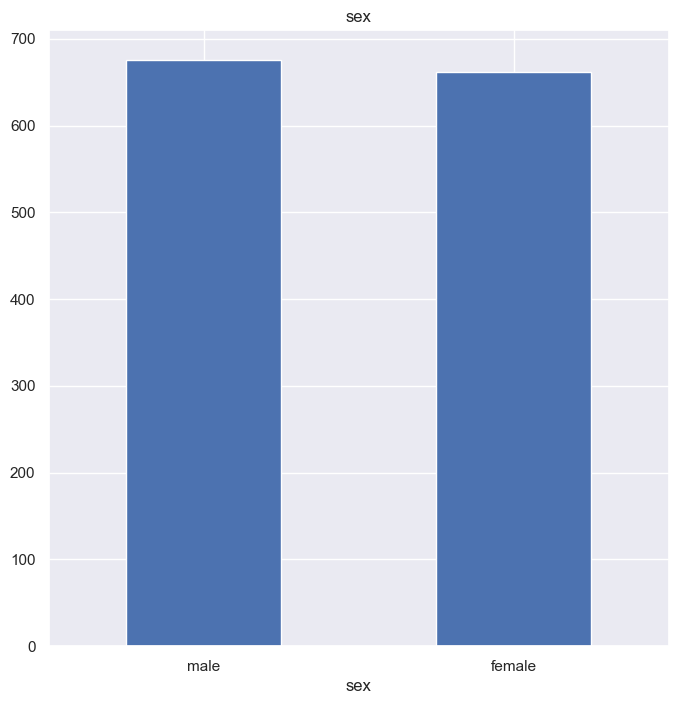

        Count  Percent
smoker                
no       1064     79.5
yes       274     20.5


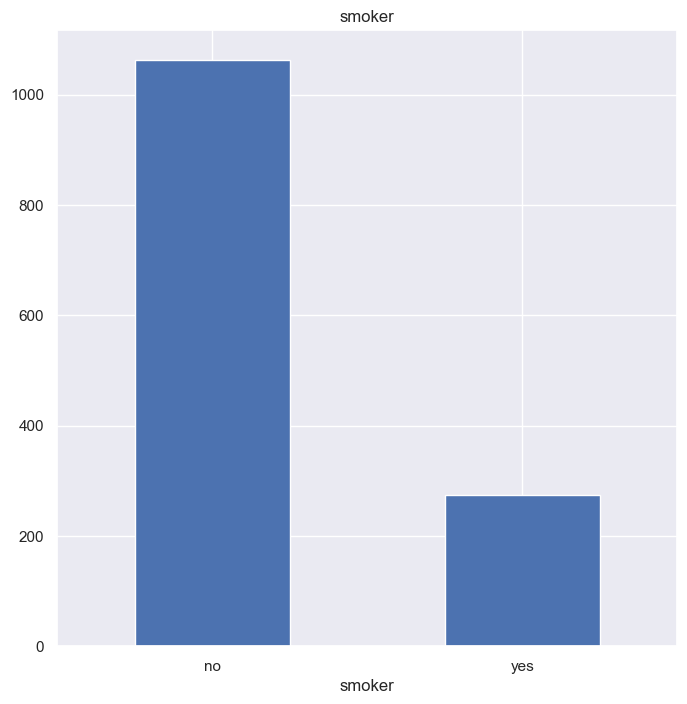

           Count  Percent
region                   
southeast    364     27.2
southwest    325     24.3
northwest    325     24.3
northeast    324     24.2


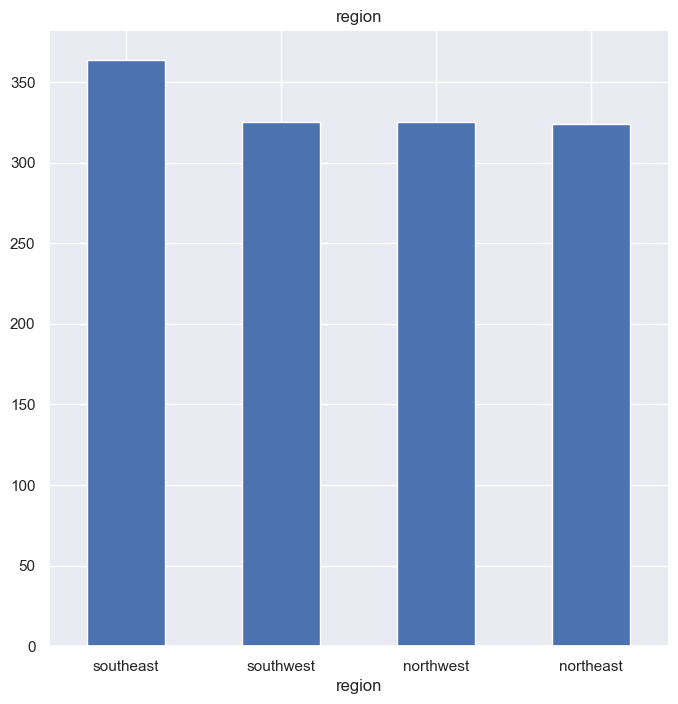

In [29]:
def plot_cat_counts(df, column_name):
    count = df[column_name].value_counts() # Count the occurrences of each category
    percent = 100 * df[column_name].value_counts(normalize=True) # Calculate the percentage of each category
    cat_df = pd.DataFrame({'Count': count, 'Percent': percent.round(1)})# Create a DataFrame to store the count and percentage
    print(line, '\n', cat_df, '\n', line, sep="") #print the output
    plt.figure(figsize=(8, 8)) # Create a bar plot for the categorical data
    count.plot(kind='bar', title=column_name)
    plt.xticks(rotation=0)  # Set the rotation angle to zero for the x-axis labels
    sns.set(font_scale=1)
    plt.show()


for column_name in cat_cols:# Loop through the cat_cols and call the function for each feature
    plot_cat_counts(df, column_name)

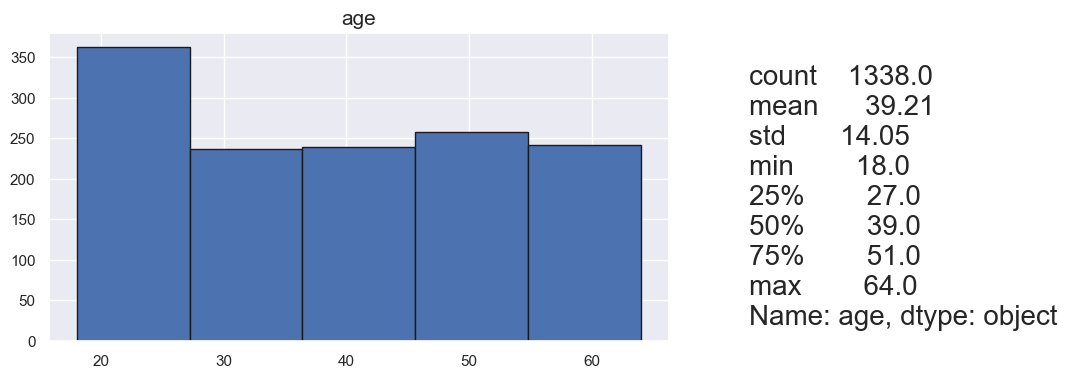

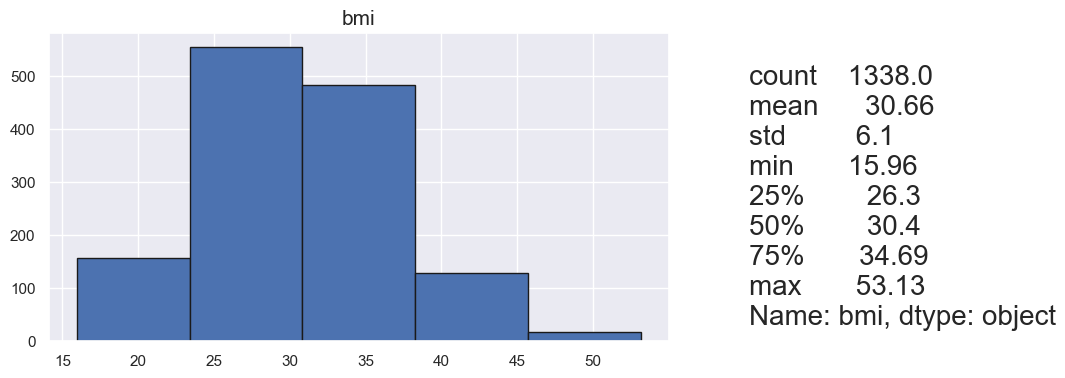

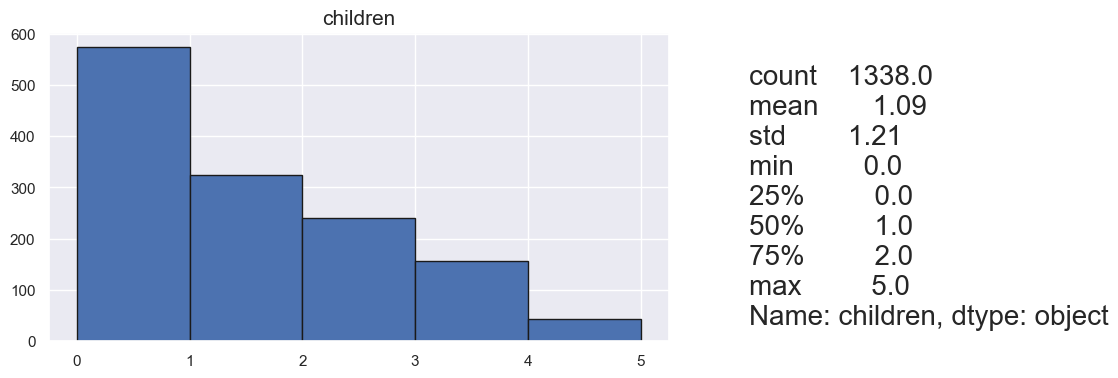

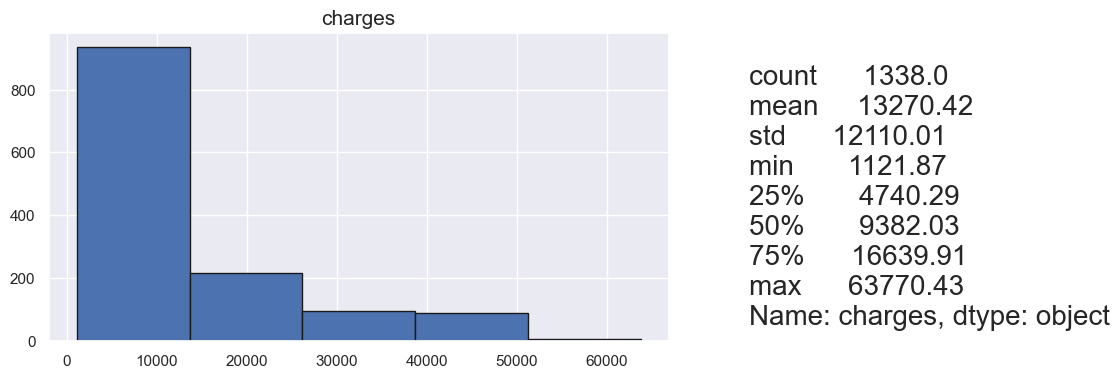

In [30]:
def desc_num_feature(feature_name, bins=5, edgecolor='k', **kwargs):# Function to describe and plot a numeric feature
    fig, ax = plt.subplots(figsize=(8, 4)) # Create a new plot
    en_df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)# Plot a histogram of the feature
    ax.set_title(feature_name, size=15)# Set the title of the plot
    plt.figtext(1, 0.15, str(en_df[feature_name].describe().round(2).astype(str)), size=20) # Add a text description of the feature's statistics to the right of the plot

# Loops through applying the function to each feature and describe it
for x in num_cols:
    desc_num_feature(x)

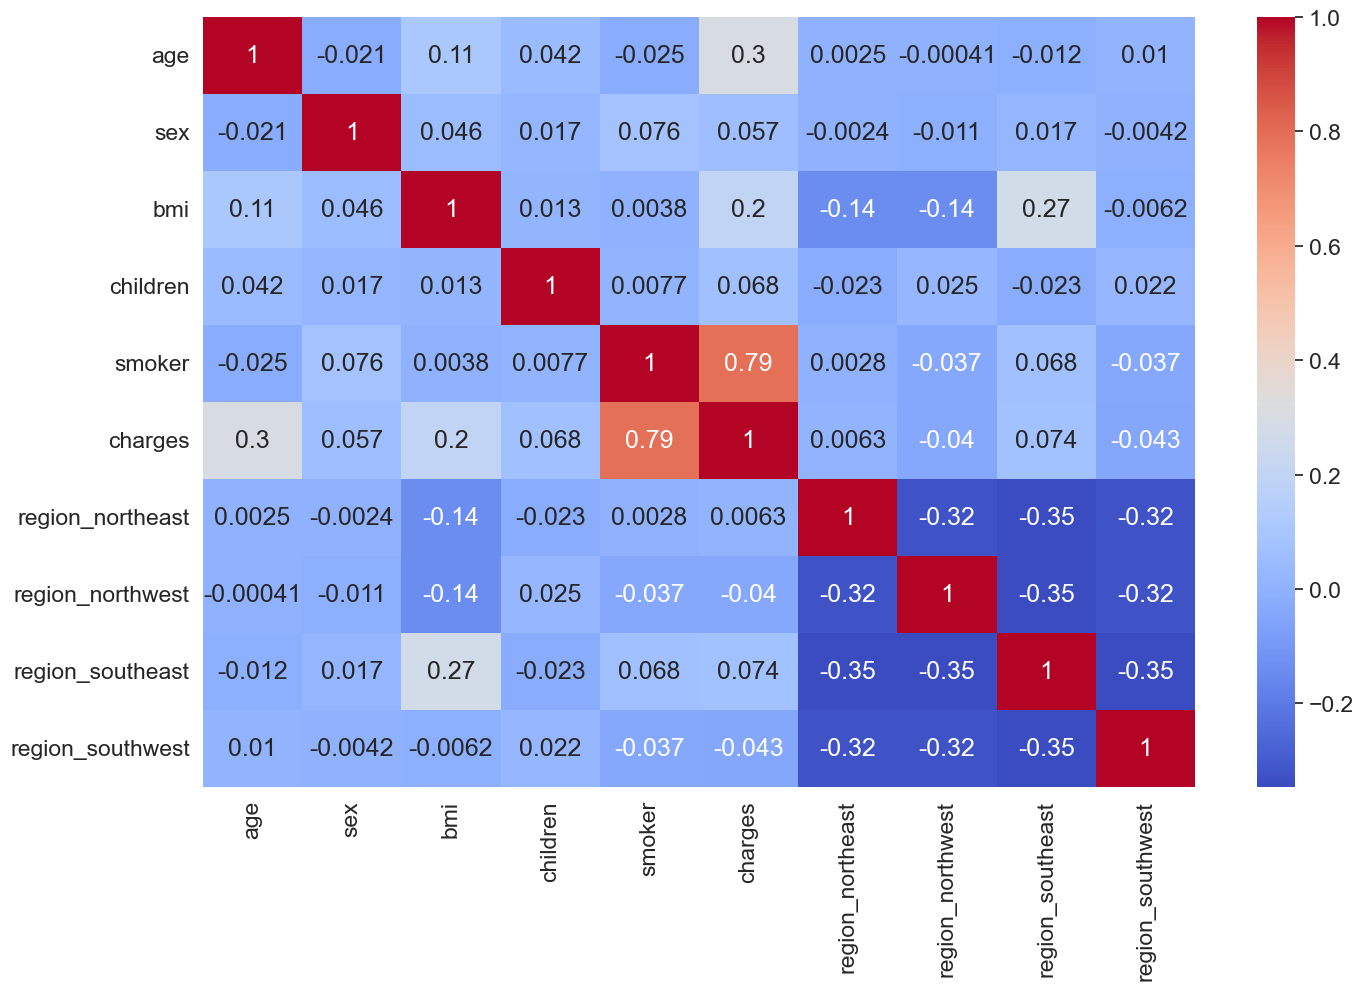

In [31]:
#creating a correlation heat map
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
sns.heatmap(en_df.corr(),cmap='coolwarm',annot=True)
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\monty\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


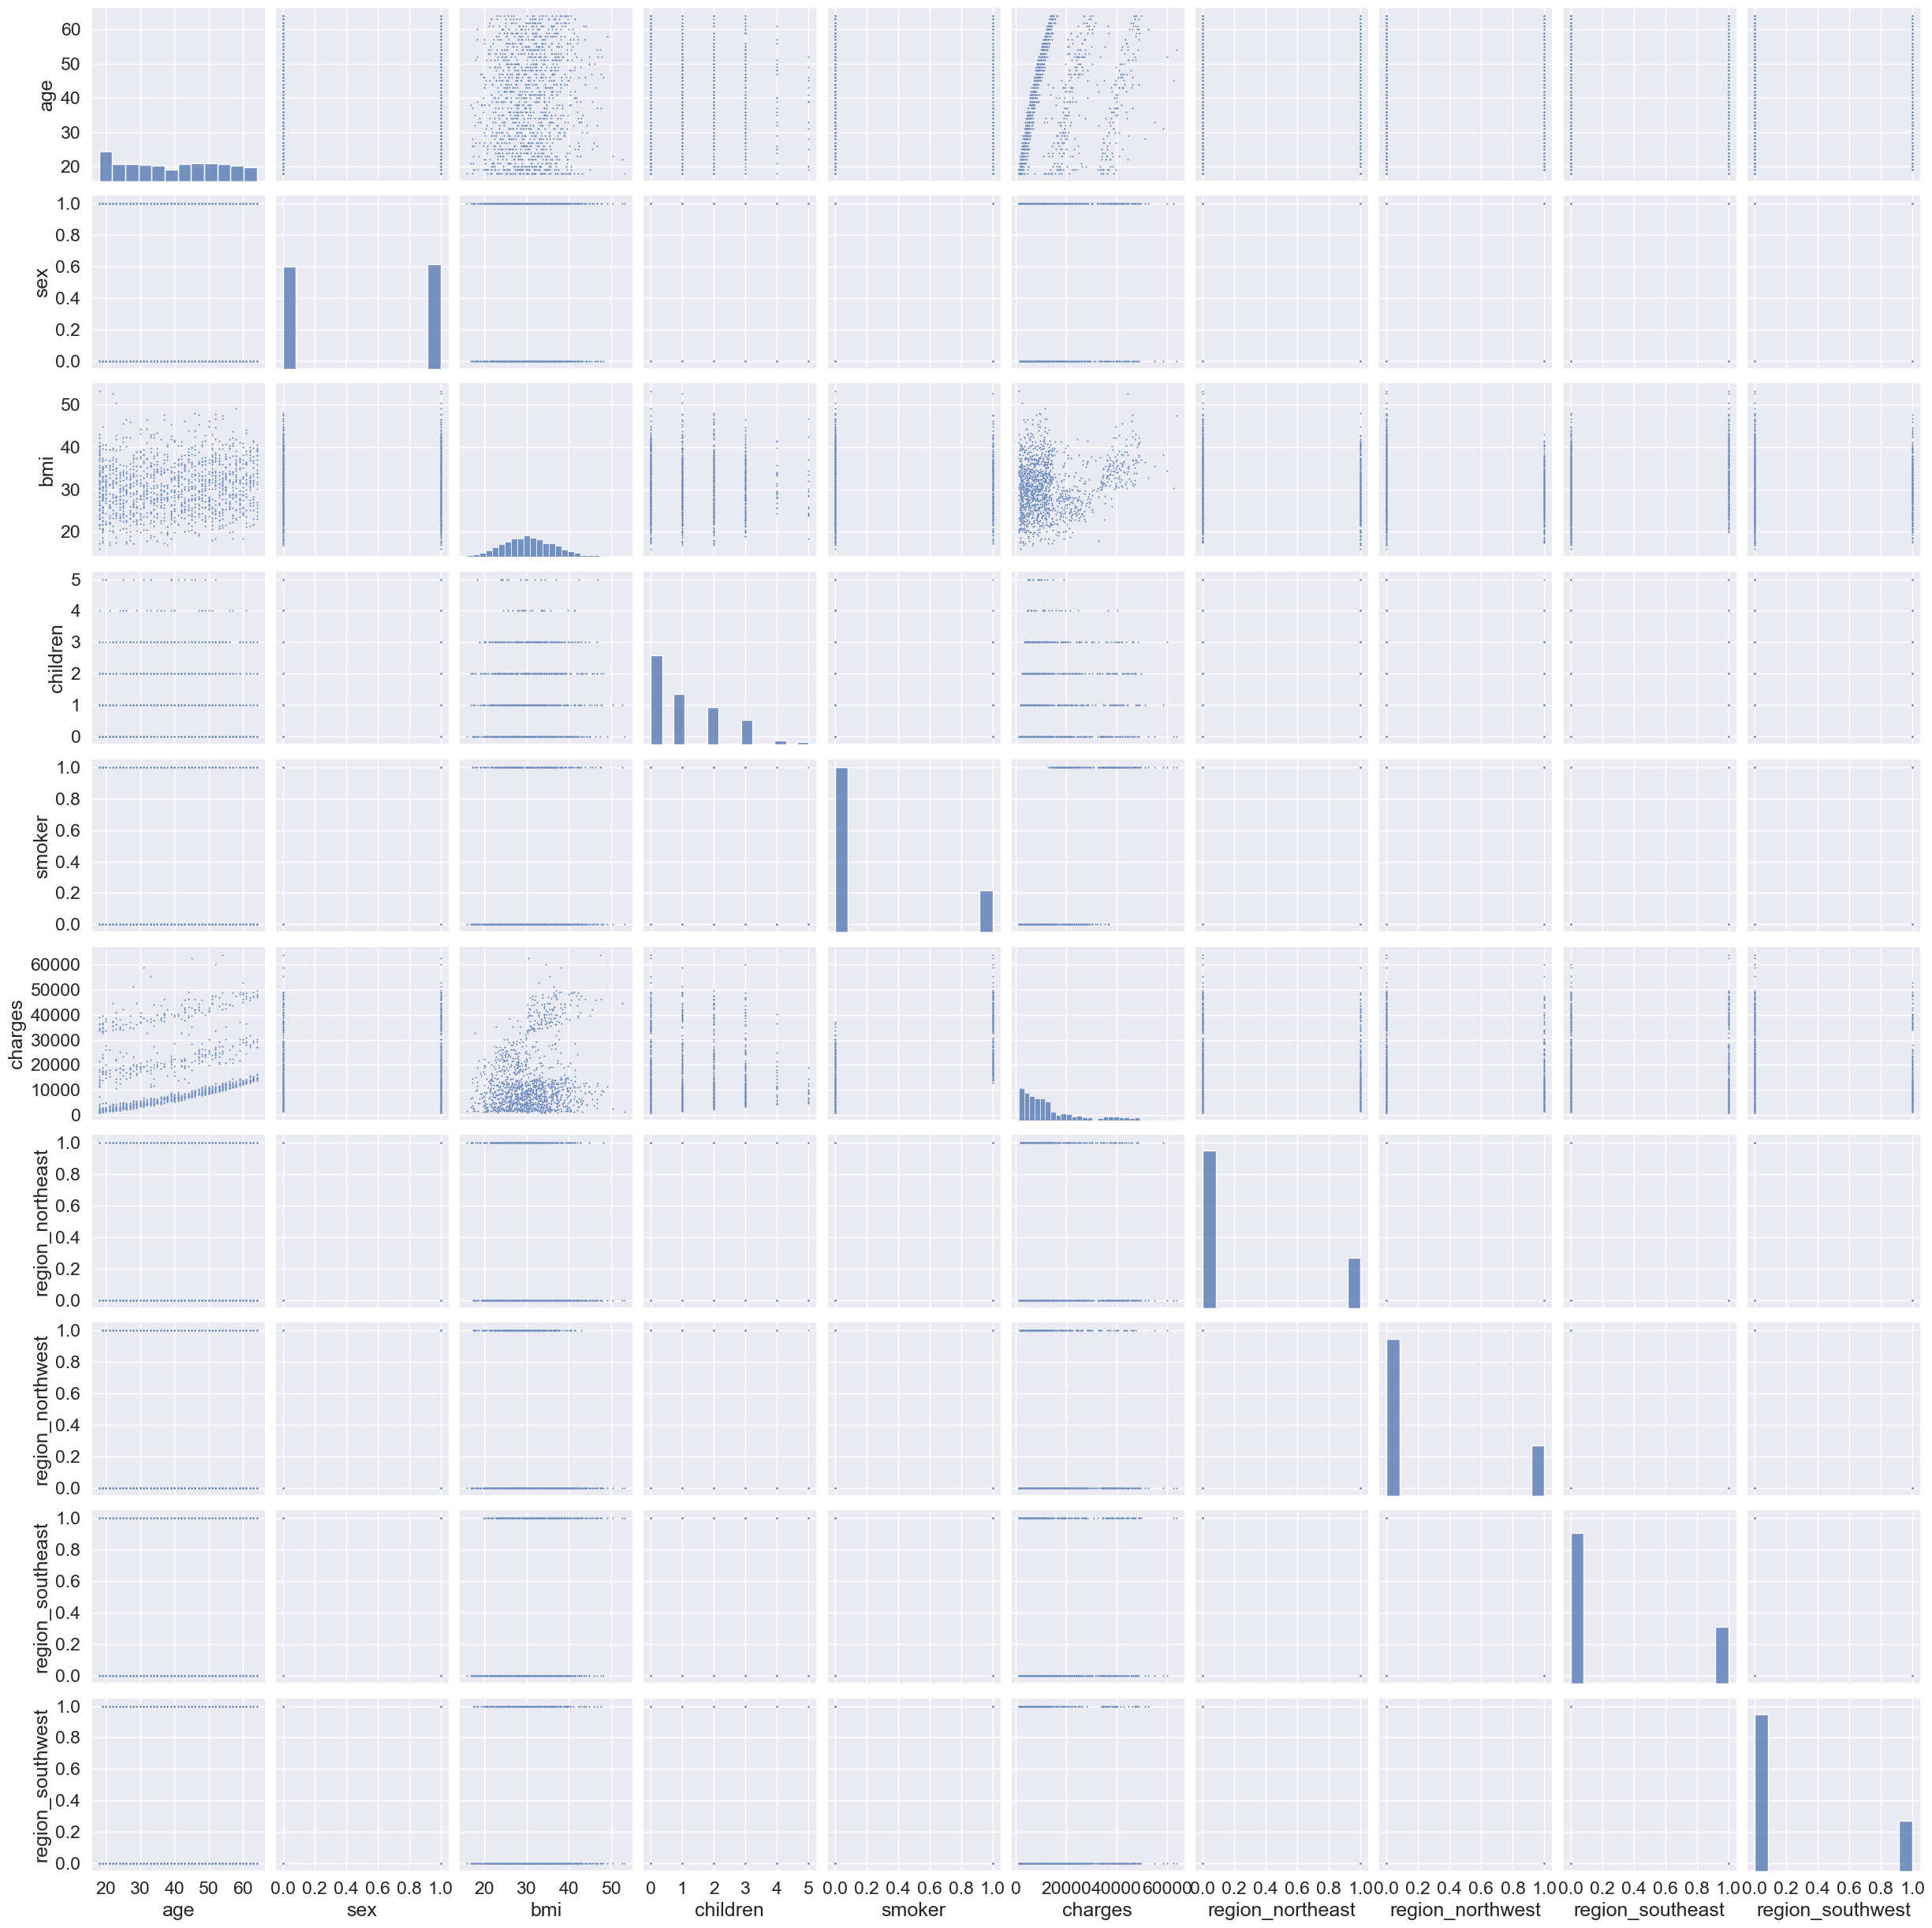

In [32]:
#creating a pairplot to visualize the relationships between the numeric and categorical features
sns.pairplot(en_df, plot_kws={"s": 2}) 
sns.set(font_scale=.8)
plt.show()

# <font color=1B5ECB>**Modeling**

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

def scale(X, y):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler
    

def train_and_evaluate_regression(X, y, model, hyperparameters=None, test_size=0.1, random_state=45, num_folds=5):
    # Split the data into a 90-10 train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    #*************add this back in if more than 1 feature****************
    # Standardize the data 
    scaler = StandardScaler() 
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a k-fold cross-validation object
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)
    
    if hyperparameters:
        # Create a GridSearchCV object to search over hyperparameters
        grid_search = GridSearchCV(model, hyperparameters, scoring='r2', cv=kf, n_jobs=-1, verbose=True)
        
        # Fit the model with the best hyperparameters
        grid_search.fit(X_train, y_train)
        
        # Get the best hyperparameters
        best_hyper = grid_search.best_params_
        
        # Get the best model
        best_model = grid_search.best_estimator_
    else:
        # No hyperparameter tuning, use the provided model
        best_model = model
    
    # Fit the best model on the training data
    best_model.fit(X_train, y_train)
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_true=y_train, y_pred=best_model.predict(X_train))
    mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    explained_variance = explained_variance_score(y_true=y_test, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    medae = median_absolute_error(y_true=y_test, y_pred=y_pred)
    
    return best_model, best_hyper, X_train, X_test, y_train, y_test, y_pred, mse_train, mse_test, r2, explained_variance, mae, medae

# copy to call function:
# best_model,best_hyper, X_train, X_test, y_train, y_test, y_pred, mse_train, mse_test, r2, explained_variance, mae, medae = train_and_evaluate_regression(X, y, Lasso(), hyperparameters)


def print_regression_metrics(mse_train, mse_test, r2, explained_variance, mae, medae, best_hyper):
    print("Best Hyperparameters:")
    for key, value in best_hyper.items():
        print(f"  {key}: {value}")
    print("Mean Squared Error (MSE) - Train: {:.4f}".format(mse_train))
    print("Mean Squared Error (MSE) - Test: {:.4f}".format(mse_test))
    print("R-squared (R2) Score: {:.4f}".format(r2))
    print("Explained Variance Score: {:.4f}".format(explained_variance))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("Median Absolute Error (MedAE): {:.4f}".format(medae))


# copy to call function:
#print_regression_metrics(mse_train, mse_test, r2, explained_variance, mae, medae, best_hyper)

def plot_predicted_vs_actual(actual1, predicted1, actual2, predicted2, actual3, predicted3, actual4, predicted4, model_names):
    """
    Visualizing the predictions vs. actual values for each model in a single plot. 

    Parameters:
    - actual1, actual2, actual3: Lists or arrays of actual values for models 1, 2, and 3.
    - predicted1, predicted2, predicted3: Lists or arrays of predicted values for models 1, 2, and 3.
    - model_names: List of model names for labeling the subplots.
    """

    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))

    # Iterate through the model data
    for i, (actual, predicted, model_name) in enumerate(zip([actual1, actual2, actual3, actual4], [predicted1, predicted2, predicted3,predicted4], model_names)):

        # Scatter plot for each model
        axes[i].scatter(actual, predicted, c='b', marker='o', alpha=0.6)
        axes[i].set_title(model_name)
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')
        axes[i].grid(True)
        axes[i].plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the figure
    plt.show()

# copy to call function:
#model_names = ["Linear Regression", "Lasso Regression", "K-Nearest Neighbors","Random Forest Regression"]
#plot_predicted_vs_actual(lr_y_test, lr_y_pred, lasso_y_test, lasso_y_pred, knn_y_test, knn_y_pred, model_names)

In [34]:
#creating model instances and hyperparameters dictionaries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
lasso = Lasso()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

lr_hyperparameters = {'fit_intercept': [True, False], 'positive': [True, False]}
lasso_hyperparameters = {'alpha': [0.01, 0.1, 1.0, 5, 10.0], 'fit_intercept': [True, False], 'positive': [True, False]}
KNN_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'metric': ['euclidean', 'manhattan', 'chebyshev']}
rf_hyperparameters = {
    'n_estimators': [100, 200, 3],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4]}

# for copying/pasting:
# hyperparameters = lasso_hyperparameters.copy()
# hyperparameters = KNN_hyperparameters.copy()
# hyperparameters = lr_hyperparameters.copy()

model_names = ["Linear Regression", "Lasso Regression", "K-Nearest Neighbors", "Random Forest Regression"]


                                 Linear Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters:
  fit_intercept: True
  positive: True
Mean Squared Error (MSE) - Train: 36763142.4802
Mean Squared Error (MSE) - Test: 34337149.7627
R-squared (R2) Score: 0.7325
Explained Variance Score: 0.7353
Mean Absolute Error (MAE): 4225.1644
Median Absolute Error (MedAE): 2857.7197

                                 Lasso Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
  alpha: 10.0
  fit_intercept: True
  positive: True
Mean Squared Error (MSE) - Train: 36764597.6164
Mean Squared Error (MSE) - Test: 34317114.6906
R-squared (R2) Score: 0.7326
Explained Variance Score: 0.7353
Mean Absolute Error (MAE): 4218.5408
Median Absolute Error (MedAE): 2830.4131

                                 K Nearest Neighbor Regression
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters:
  algorithm: auto
  

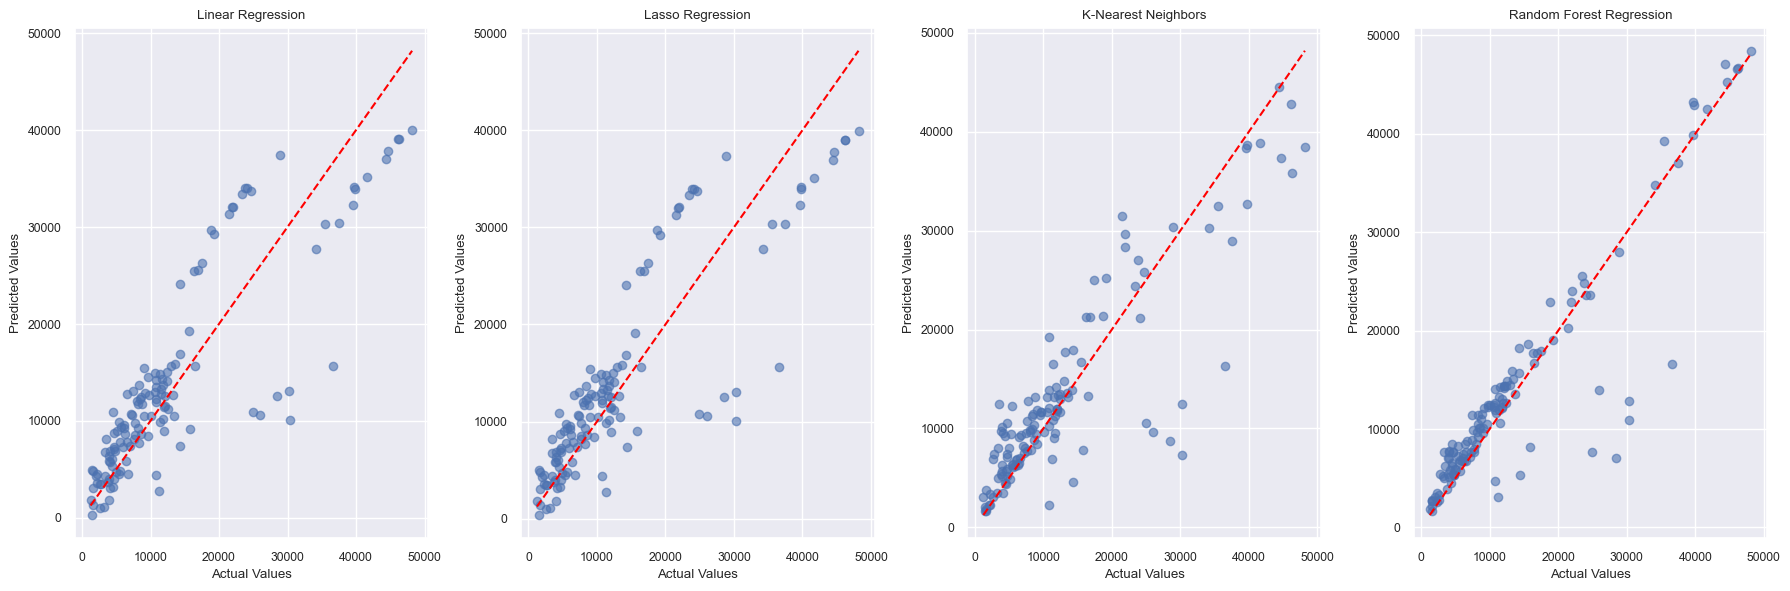

In [35]:
X = en_df.drop('charges',axis=1).copy()
y = en_df['charges']

#calling function for each model type, calling function printing the results, and calling function to plotting predictions vs actual values for each model in a single plot.
print(line,'\n', space,'Linear Regression\n',line,sep='')
hyperparameters = lr_hyperparameters.copy()
lr_best_model,lr_best_hyper,lr_X_train, lr_X_test, lr_y_train, lr_y_test, lr_y_pred, lr_mse_train, lr_mse_test, lr_r2, lr_explained_variance, lr_mae, lr_medae = train_and_evaluate_regression(X, y, lr, hyperparameters)
print_regression_metrics(lr_mse_train, lr_mse_test, lr_r2, lr_explained_variance, lr_mae, lr_medae, lr_best_hyper)

print('\n',line, '\n', space,'Lasso Regression\n',line,sep='')
hyperparameters = lasso_hyperparameters.copy()
lasso_best_model,lasso_best_hyper, lasso_X_train, lasso_X_test, lasso_y_train, lasso_y_test, lasso_y_pred, lasso_mse_train, lasso_mse_test, lasso_r2, lasso_explained_variance, lasso_mae, lasso_medae = train_and_evaluate_regression(X, y, lasso , hyperparameters)
print_regression_metrics(lasso_mse_train, lasso_mse_test, lasso_r2, lasso_explained_variance, lasso_mae, lasso_medae, lasso_best_hyper)

print('\n',line, '\n', space,'K Nearest Neighbor Regression\n',line,sep='')
hyperparameters = KNN_hyperparameters.copy()
knn_best_model,knn_best_hyper, knn_X_train, knn_X_test, knn_y_train, knn_y_test, knn_y_pred, knn_mse_train, knn_mse_test, knn_r2, knn_explained_variance, knn_mae, knn_medae = train_and_evaluate_regression(X, y, knn, hyperparameters)
print_regression_metrics(knn_mse_train, knn_mse_test, knn_r2, knn_explained_variance, knn_mae, knn_medae, knn_best_hyper)

print('\n',line, '\n', space,'Random Forest\n',line,sep='')
hyperparameters = rf_hyperparameters.copy()
rf_best_model,rf_best_hyper, rf_X_train, rf_X_test, rf_y_train, rf_y_test, rf_y_pred, rf_mse_train, rf_mse_test, rf_r2, rf_explained_variance, rf_mae, rf_medae = train_and_evaluate_regression(X, y, rf, hyperparameters)
print_regression_metrics(rf_mse_train, rf_mse_test, rf_r2, rf_explained_variance, rf_mae, rf_medae, rf_best_hyper)
print(line,'\n',line,'\n',sep='')

plot_predicted_vs_actual(lr_y_test, lr_y_pred, lasso_y_test, lasso_y_pred,knn_y_test, knn_y_pred, rf_y_test, rf_y_pred, model_names)

# <font color=1B5ECB>**Exporting Model and Scaler**

In [41]:
import joblib
# Serializing the scaler
scaler = StandardScaler() 
scaler.fit(X)
joblib.dump(scaler, "./model/scaler.pk1")
# Serializing the best tuned models
joblib.dump(rf_best_model, './model/rf_best_model.pk1')

['./model/rf_best_model.pk1']